<a href="https://colab.research.google.com/github/reetdas/News-Sentiment-Analysis/blob/main/News_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install newsapi-python

In [2]:
!pip install transformers

In [3]:
from newsapi import NewsApiClient
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline

In [4]:
newsapi = NewsApiClient(api_key='a3e0c0522e164c3bb7d154c777751bea')

In [5]:
user_query = input("Enter your subject: ")

all_articles = newsapi.get_everything(
    q=user_query,
    language='en',
)
for article in all_articles['articles']:
    print('Source : ',article['source']['name'])
    print('Title : ',article['title'])
    print('Description : ',article['description'],'\n\n')

#save this data in a csv file
df = pd.DataFrame(all_articles['articles'])
df.to_csv('news.csv')

Enter your subject: Nvidia
Source :  The Verge
Title :  Nvidia overtakes Microsoft as the world’s most valuable company
Description :  Nvidia’s market cap closed on June 18th at $3.335 trillion, riding an AI boom powered by the company’s GPUs pushing it past Apple, Google, and Microsoft. 


Source :  [Removed]
Title :  [Removed]
Description :  [Removed] 


Source :  [Removed]
Title :  [Removed]
Description :  [Removed] 


Source :  [Removed]
Title :  [Removed]
Description :  [Removed] 


Source :  [Removed]
Title :  [Removed]
Description :  [Removed] 


Source :  Harvard Business Review
Title :  How Organizations Are Using Custom AI to Protect Data and Drive Efficiency - SPONSOR CONTENT FROM NVIDIA
Description :  Sponsor Content from NVIDIA. 


Source :  ReadWrite
Title :  Nvidia CEO Jensen Huang’s net worth surges to $90B on demand for AI chips
Description :  Nvidia CEO and co-founder Jensen Huang saw his net worth significantly increase on Thursday (May 23) as shares of his… Continue

In [6]:
df = pd.read_csv("news.csv")
df.head()

,Unnamed: 0,source,author,title,description,url,urlToImage,publishedAt,content
0,0,"{'id': 'the-verge', 'name': 'The Verge'}",Richard Lawler,Nvidia overtakes Microsoft as the world’s most...,Nvidia’s market cap closed on June 18th at $3....,https://www.theverge.com/2024/6/18/24181393/nv...,https://cdn.vox-cdn.com/thumbor/oSDcNZcYzqmx4j...,2024-06-18T22:44:32Z,Nvidia overtakes Microsoft as the worlds most ...
1,1,"{'id': None, 'name': '[Removed]'}",NaN,[Removed],[Removed],https://removed.com,NaN,1970-01-01T00:00:00Z,[Removed]
2,2,"{'id': None, 'name': '[Removed]'}",NaN,[Removed],[Removed],https://removed.com,NaN,1970-01-01T00:00:00Z,[Removed]
3,3,"{'id': None, 'name': '[Removed]'}",NaN,[Removed],[Removed],https://removed.com,NaN,1970-01-01T00:00:00Z,[Removed]
4,4,"{'id': None, 'name': '[Removed]'}",NaN,[Removed],[Removed],https://removed.com,NaN,1970-01-01T00:00:00Z,[Removed]


In [7]:
def sentiment_analysis(text):
  highest_score = 0
  highest_label = None
  model = pipeline("sentiment-analysis", top_k = None,
              model = "cardiffnlp/twitter-roberta-base-sentiment-latest",
              device = 0, padding = True, truncation = True,
              max_length = 512,
              verbose = False)
  val = model(text)[0]
  for score_dict in val:
    if score_dict['score'] > highest_score:
        highest_score = score_dict['score']
        highest_label = score_dict['label']

  return highest_label

In [8]:
# Source - https://www.brookings.edu/2022/08/11/the-future-of-crypto-regulation-highlights-from-the-brookings-event/

txt = """
1. HIGHER LEVELS OF RETAIL PARTICIPATION IN CRYPTO THAN TRADITIONAL COMMODITY MARKETS POSE UNIQUE CHALLENGES FOR REGULATORS.

One in five Americans report having traded cryptocurrency, and polls suggest crypto trading is more common among younger adults, men, and racial minorities. This is quite different from other financial instruments regulated by the CFTC, Benham noted. “You’re going to have more vulnerable investors… It’s incumbent on us to educate, to inform, to disclose risks involved.”

Michael Piwowar, a former Securities and Exchange Commissioner and now executive director of the Milken Institute Center for Financial Markets, linked increased Congressional attention to growth in retail crypto: “If you got one in five households that have interacted with crypto… [members of Congress] are going to start hearing it from their constituents.” Legislation to regulate digital assets has been introduced by Senators Lummis and Gillibrand, Stabenow and Boozman, and Toomey, as well as Representative Gottheimer. The Treasury is actively negotiating bipartisan stablecoin legislation with House Financial Services Committee Chair Waters and Ranking Member McHenry. Benham said that stablecoins, digital currency meant to always be equal to one dollar, are more of a “payment mechanism” and thus should be regulated by prudential banking regulators.

Digital asset regulation may require addressing crypto exchanges and digital wallets. American University Law Professor Hilary Allen noted that the stablecoin legislation under discussion does not, saying, “That is a gaping hole… Almost every major stablecoin… is affiliated with an exchange that profits from trading in that stablecoin.” Mark Wetjen, a former CFTC commissioner and current head of policy and regulatory strategy for FTX (one of the largest crypto exchanges), agreed: “The exchanges are the gateways to the entire crypto space, and so oversight of them is probably most important.” He pushed back that there was no current regulation, noting the requirement for state level licenses, such as New York’s Bitlicense: “If you want to list derivatives on bitcoin, for example, you need a license… so it may not be as dire a situation.”

2. CRYPTO CHALLENGES TRADITIONAL REGULATORY DISTINCTION BETWEEN SECURITIES AND COMMODITIES.

Traditionally, the SEC regulates securities while the CFTC regulates commodities and derivatives. Whether crypto is a security or commodity remains unclear, as various subcomponents of the crypto ecosystem challenge existing regulatory divisions. For instance, the SEC recently argued  that nine different crypto tokens were securities in an insider trading case while a federal judge ruled that virtual currency like Bitcoin constitutes a commodity.

Benham called on Congress to provide clarity on which of the hundreds – if not thousands – of coins in existence are securities versus commodities: “Ultimately, we’d like to see law drawing lines.” Piwowar said the lack of clarity creates unwelcome delays as many crypto-related applications before the SEC are “not getting answers” on whether their products represent securities. The result is that some crypto firms are “going outside the United States” to locate their business. Allen cautioned, though, that Congressional action could also constitute an indication that the government supports crypto. She warned against letting crypto into the regulated sphere for fear of giving it “implicit guarantees.”

A solution to the regulatory turf battle could be merging the SEC and CFTC, which Piwowar endorsed, as have many others. Congress, however, has shown little appetite to do so given the different Congressional committee jurisdictions involved.

3. CFTC WILL RESTRUCTURE TO BETTER PROTECT CONSUMERS AND MORE EFFECTIVELY REGULATE MARKETS.
Benham announced several changes at the CFTC during the Brookings event. First, LabCFTC will become the Office of Technology Innovation, reporting directly to the Chairman’s office. Behnam justified this by stating, “We are past the incubator stage, and digital assets and decentralized financial technologies have outgrown their sandboxes.” Second, CFTC’s Office of Customer Education and Outreach will be realigned within the Office of Public Affairs, which Behnam said would “leverage resources and a broader understanding of the issues facing the general public towards addressing the most critical needs in the most vulnerable communities.” Restructuring within a regulator may appear a bureaucratic shuffle but can reflect changes in internal power, agency focus, and prioritization. Directly reporting to the chair increases an office’s authority and prestige.

4. IS CRYPTO A PASSING FAD (OR WORSE, A BUBBLE THAT THREATENS FINANCIAL MARKETS)?
Allen argued that crypto is “purposely less efficient and more complicated than a more centralized system,” and does not have any societal value. FTX’s Wetjen disagreed: “The difference here with blockchain as the underpinning means by which you can transfer value is that there are absolutely no gates.” Piwowar broadly agreed with Wetjen that “We’re going to have the new generation of Amazons and Googles come out of this stuff,” but cautioned that while he was at the SEC, “Nine out of ten [crypto applications] were outright fraud, and then out of the one out of ten, nine out of ten of those were probably fraud.” Since January 2021, over 46,000 people have collectively lost over $1 billion to scams involving crypto.

Everyone wants to avoid a repeat of the 2008 global financial crisis. To do so, regulators have focused on avoiding and mitigating “systemic risk” to the financial system. Asked if he sees a “clear and present danger to the existing economic system,” Benham said he did not, pointing out that crypto is not sufficiently interconnected to pose systemic risk. He noted the decrease in crypto values over the past several months did not cause ripples in the financial system or the broader economy. Piwowar turned the question of systemic risk back onto the actions of financial regulators asking: “What is systemic risk?  It’s the risk that a federal policymaker is going to bail out a bank, either directly or indirectly.” Allen agreed that bailing out crypto would be a mistake quipping: “If anything should be able to fail, it should be crypto, which isn’t… funding productive economic capacity.”

Allen also noted the similarity in arguments centered on American global competitiveness which promoted lax regulation for derivatives: “It’s almost identical to the rhetoric we saw around swaps in the 1990s.” Credit default swaps, like crypto now, faced loose regulation and ultimately helped fuel the subprime mortgage crisis. Behnam noted that one of 2008’s biggest lessons was the need for the CFTC to promote market transparency in the “OTC [over-the-counter] derivative space.” Crypto proponents point to the underlying technology as being inherently more transparent, while critics point to the lack of understanding of aspects of the market, such as what assets back stablecoins like Tether.

5. DOES CRYPTO INCREASE FINANCIAL INCLUSION?
Cryptocurrency proponents frequently cite financial inclusion as a major benefit linking the higher usage of youth and communities of color who have higher rates of being unbanked or underbanked by traditional finance. Allen cautioned against “predatory inclusion” arguing that, “Because there’s no productive capacity behind them, their value derives from finding someone else to buy them from you.” Wetjen’s responded, blending his experience serving as a CFTC Commissioner with his time in the crypto industry: “From my own experience… at the CFTC, there’s plenty of authority that’s already in place for the agency to… be pretty thoughtful and relatively prescriptive, even in terms of what actually should be disclosed to, particularly, retail investors, or users of a platform such as FTX.” He argued that the right policy is “giving people the opportunity to be involved and invest in the space that they like but making sure that it’s done with the right safeguards.”

"""

print(sentiment_analysis(txt))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

neutral


In [10]:
df['description'] = df['description'].astype(str)

In [11]:
df['sentiments'] = df['description'].apply(sentiment_analysis)
df.head()

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassifi

,Unnamed: 0,source,author,title,description,url,urlToImage,publishedAt,content,sentiments
0,0,"{'id': 'the-verge', 'name': 'The Verge'}",Richard Lawler,Nvidia overtakes Microsoft as the world’s most...,Nvidia’s market cap closed on June 18th at $3....,https://www.theverge.com/2024/6/18/24181393/nv...,https://cdn.vox-cdn.com/thumbor/oSDcNZcYzqmx4j...,2024-06-18T22:44:32Z,Nvidia overtakes Microsoft as the worlds most ...,positive
1,1,"{'id': None, 'name': '[Removed]'}",NaN,[Removed],[Removed],https://removed.com,NaN,1970-01-01T00:00:00Z,[Removed],neutral
2,2,"{'id': None, 'name': '[Removed]'}",NaN,[Removed],[Removed],https://removed.com,NaN,1970-01-01T00:00:00Z,[Removed],neutral
3,3,"{'id': None, 'name': '[Removed]'}",NaN,[Removed],[Removed],https://removed.com,NaN,1970-01-01T00:00:00Z,[Removed],neutral
4,4,"{'id': None, 'name': '[Removed]'}",NaN,[Removed],[Removed],https://removed.com,NaN,1970-01-01T00:00:00Z,[Removed],neutral


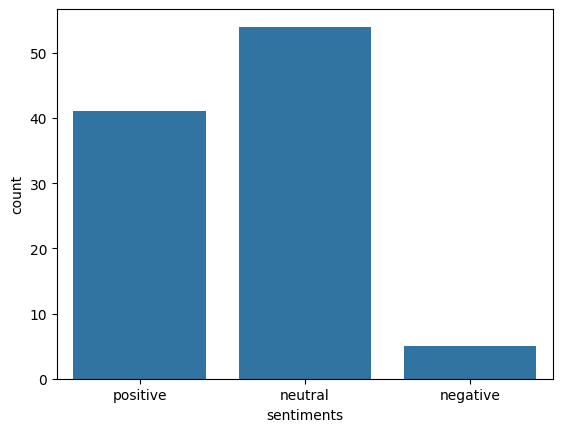

In [12]:
ax = sns.countplot(x="sentiments", data=df)

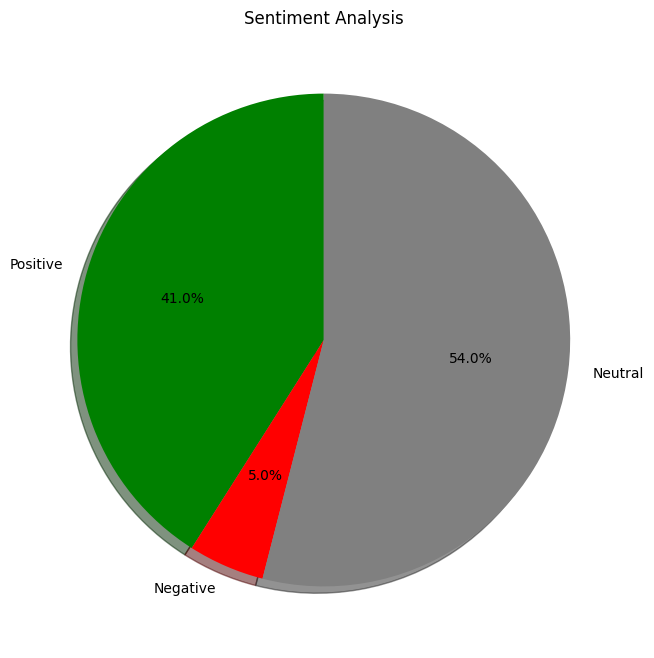

In [13]:
positive = 0
negative = 0
neutral = 0

for elements in df.sentiments:
  if elements == "positive":
    positive = positive + 1
  elif elements == "negative":
    negative = negative + 1
  else:
    neutral = neutral + 1

colors = ['green', 'red', 'grey']
sizes = [positive, negative, neutral]
labels = 'Positive', 'Negative', 'Neutral'

plt.figure(figsize=(15,8))
plt.pie(
    x=sizes,
    autopct='%1.1f%%',
    colors=colors,
    labels=labels,
    startangle=90,
    shadow=True,

)

plt.title("Sentiment Analysis")
plt.show()